# Data Cleaning 

In [1]:
# Load the required libraries 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

from datetime import date 

In [2]:
# Load the data sets 
df = pd.read_csv("../data/raw/fraudTrain.csv", index_col=0)

In [3]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.columns 

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

**Need to get the month, date and hour of transaction separately**

In [5]:
# Convert to datetime
df["trans_date_trans_time"] = pd.to_datetime(
    df["trans_date_trans_time"], 
    errors="raise", 
    format="%Y-%m-%d %H:%M:%S"
)

df["trans_date_trans_time"].tail()

1296670   2020-06-21 12:12:08
1296671   2020-06-21 12:12:19
1296672   2020-06-21 12:12:32
1296673   2020-06-21 12:13:36
1296674   2020-06-21 12:13:37
Name: trans_date_trans_time, dtype: datetime64[ns]

In [6]:
# Extract month, day and hour of transaction
df["trans_month"] = df["trans_date_trans_time"].dt.month
df["trans_day"] = df["trans_date_trans_time"].dt.day
df["trans_hour"] = df["trans_date_trans_time"].dt.hour

In [7]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_month,trans_day,trans_hour
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,1,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,1,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,1,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1,1,0


In [8]:
# Drop the transaction time  
df.drop(["trans_date_trans_time"], axis=1, inplace=True)
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_month,trans_day,trans_hour
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,1,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,1,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,1,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1,1,0


**Get the calculate the age of customers**

In [9]:
def calculate_age(birth_date):
    """
    This function calculates date from the difference between;
        - today date 
        - date of birth

    And truncates to return the age in years
    """
    today_date = date.today()
    age  = int((today_date - birth_date).days / 365)
    return age

# Test the function 
customer_1_age = pd.to_datetime(df["dob"][0]).date()
calculate_age(customer_1_age)

37

In [10]:
# Apply the function to the data set  
## Convert the column to datetime object 
df["dob"] = pd.to_datetime(df["dob"], errors="raise")
# df["dob"].apply(calculate_age)

In [11]:
df["age"] = [calculate_age(dob.date()) for dob in df["dob"]]

In [12]:
df.drop("dob", axis=1, inplace=True) # Drop the date of birth column
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_month,trans_day,trans_hour,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,1,0,37
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,1,0,47
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,1,0,63
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1,0,58
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1,1,0,39


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   cc_num       1296675 non-null  int64  
 1   merchant     1296675 non-null  object 
 2   category     1296675 non-null  object 
 3   amt          1296675 non-null  float64
 4   first        1296675 non-null  object 
 5   last         1296675 non-null  object 
 6   gender       1296675 non-null  object 
 7   street       1296675 non-null  object 
 8   city         1296675 non-null  object 
 9   state        1296675 non-null  object 
 10  zip          1296675 non-null  int64  
 11  lat          1296675 non-null  float64
 12  long         1296675 non-null  float64
 13  city_pop     1296675 non-null  int64  
 14  job          1296675 non-null  object 
 15  trans_num    1296675 non-null  object 
 16  unix_time    1296675 non-null  int64  
 17  merch_lat    1296675 non-null  float64
 18  merch_l

In [14]:
# Drop irrelevant columns 
df.drop(
    ["cc_num", "first", "last", "trans_num"],
    axis=1, 
    inplace = True
)

# Confirm the operation
df.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,trans_month,trans_day,trans_hour,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,1,1,0,37
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,1,1,0,47
2,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,1,1,0,63
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,1,1,0,58
4,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,1,1,0,39


Drop unix time as it is inaacurate. The time dates back from 2011 to July 2013. Which is inacurate as compared to the transaction time

In [15]:
df.drop(["unix_time"], axis=1, inplace=True)

In [16]:
# Write the clean data for feature engineering 
df.to_csv("../data/fraudTrainClean.csv")

# Explanatory Data Analysis 

In [17]:
df["category"].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [18]:
df["street"].nunique()

983

In [19]:
df["city"].nunique()

894

In [20]:
df.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,trans_month,trans_day,trans_hour,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,1,1,0,37
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,1,1,0,47
2,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,1,1,0,63
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,1,1,0,58
4,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,1,1,0,39


**top ten cities with the most legit transactions**

In [21]:
# Get the the legit and fraudulent transactions 
legit_df = df[df["is_fraud"]==0]
fraud_df = df[df["is_fraud"]==1]

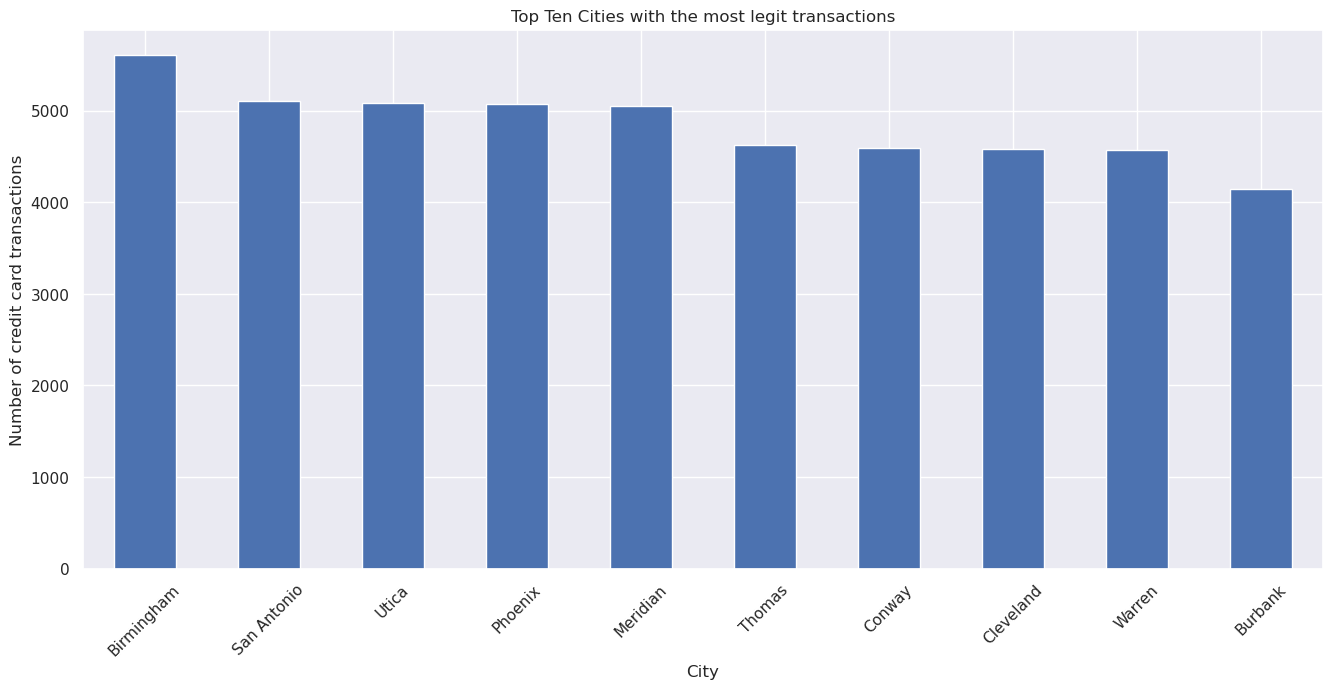

In [22]:
%matplotlib inline 
sns.set()

# Plot the data - tp cities with legit transactions 
legit_df["city"].value_counts()[:10].plot(
    kind="bar", 
    rot=45, 
    figsize=(16, 7)
)
plt.title("Top Ten Cities with the most legit transactions")
plt.ylabel("Number of credit card transactions")
plt.xlabel("City")
plt.show()

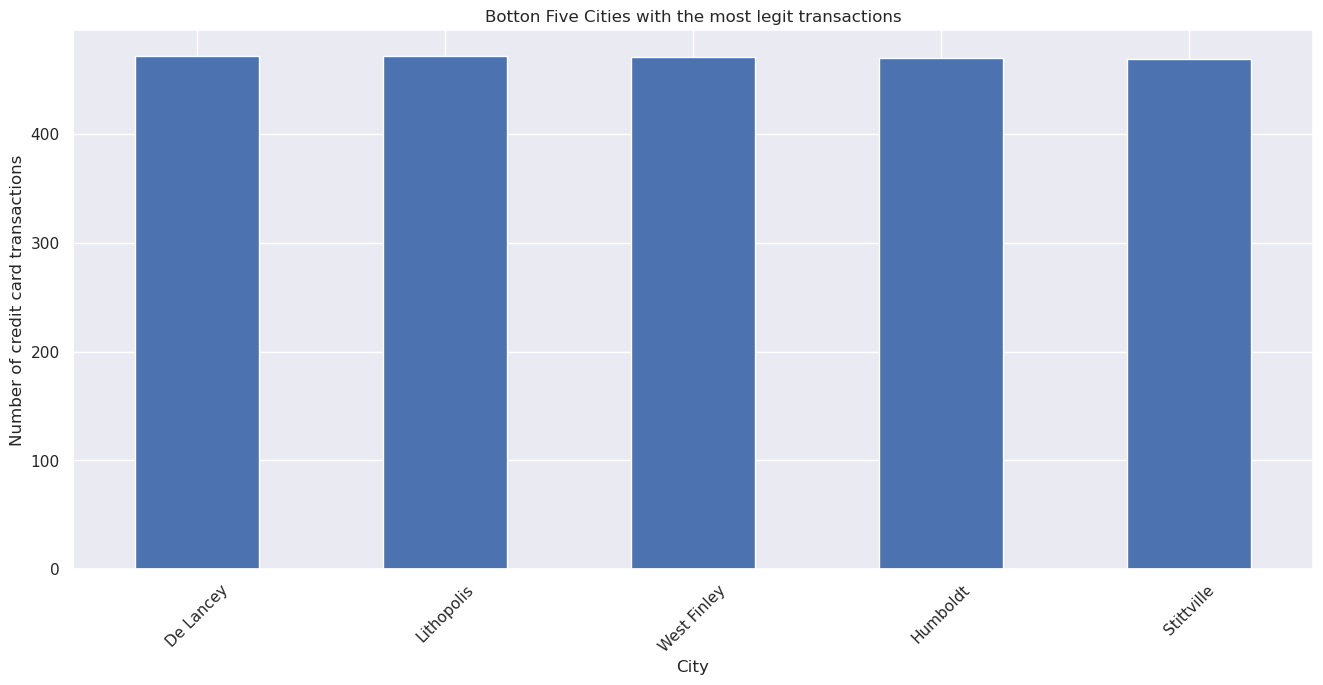

In [23]:
# Plot the data - botton 5 cities with legit transactions 
legit_df["city"].value_counts()[-5:].plot(
    kind="bar", 
    rot=45, 
    figsize=(16, 7)
)
plt.title("Botton Five Cities with the most legit transactions")
plt.ylabel("Number of credit card transactions")
plt.xlabel("City")
plt.show()

**Fradulent Transactions per city**

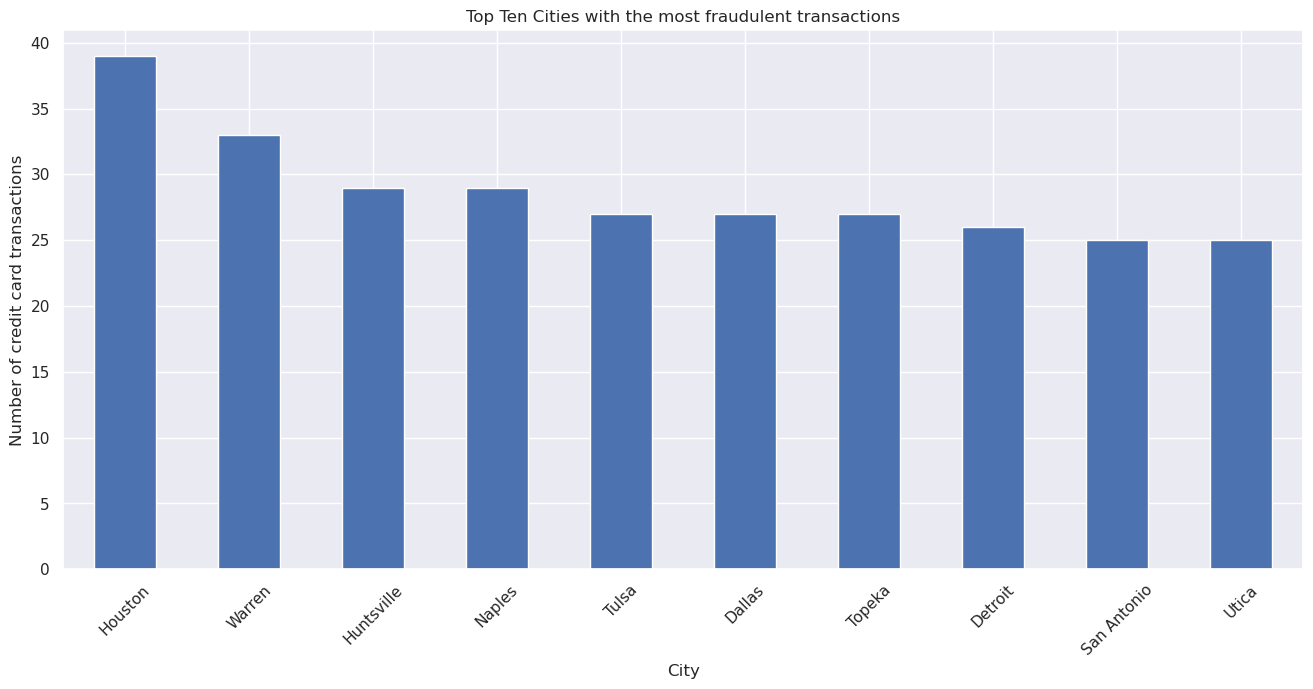

In [24]:
# Plot the data - tp cities with fraudulent transactions 
fraud_df["city"].value_counts()[:10].plot(
    kind="bar", 
    rot=45, 
    figsize=(16, 7)
)
plt.title("Top Ten Cities with the most fraudulent transactions")
plt.ylabel("Number of credit card transactions")
plt.xlabel("City")
plt.show()

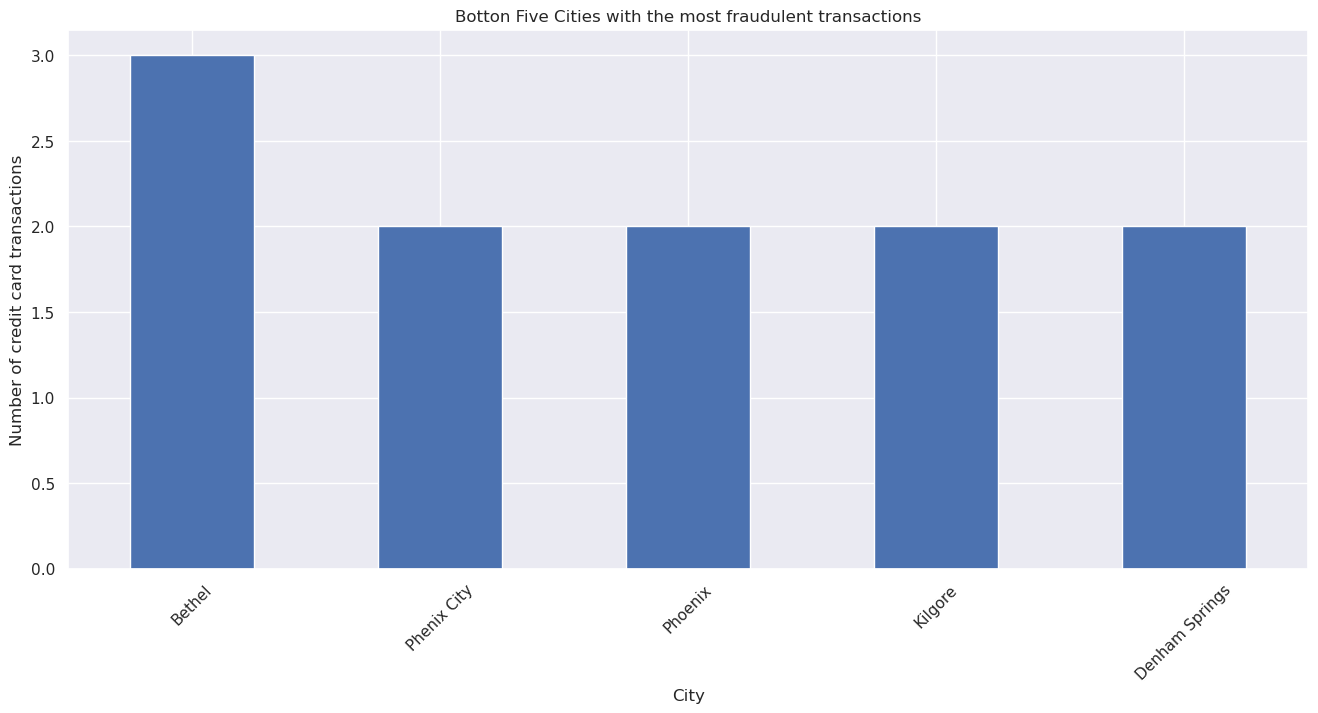

In [25]:
# Plot the data - botton 5 cities with fraud transactions 
fraud_df["city"].value_counts()[-5:].plot(
    kind="bar", 
    rot=45, 
    figsize=(16, 7)
)
plt.title("Botton Five Cities with the most fraudulent transactions")
plt.ylabel("Number of credit card transactions")
plt.xlabel("City")
plt.show()

In [26]:
# Number of transactions vs city population 
average_pop_by_city = df[["city", "city_pop"]].groupby("city").mean() 

no_of_transactions_per_city = pd.DataFrame(df["city"].value_counts())

# merge the dataframes 
city_transactions_and_pop = pd.merge(
    left=no_of_transactions_per_city,
    right=average_pop_by_city,
    on="city"
)

# Check the merged dataframe 
city_transactions_and_pop

,count,city_pop
city,,
Birmingham,5617,2.260665e+05
San Antonio,5130,1.595797e+06
Utica,5105,5.200725e+02
Phoenix,5075,1.312922e+06
Meridian,5060,4.280008e+04
...,...,...
Norfolk,7,2.428030e+05
Karns City,7,1.888000e+03
Streator,7,2.013300e+04


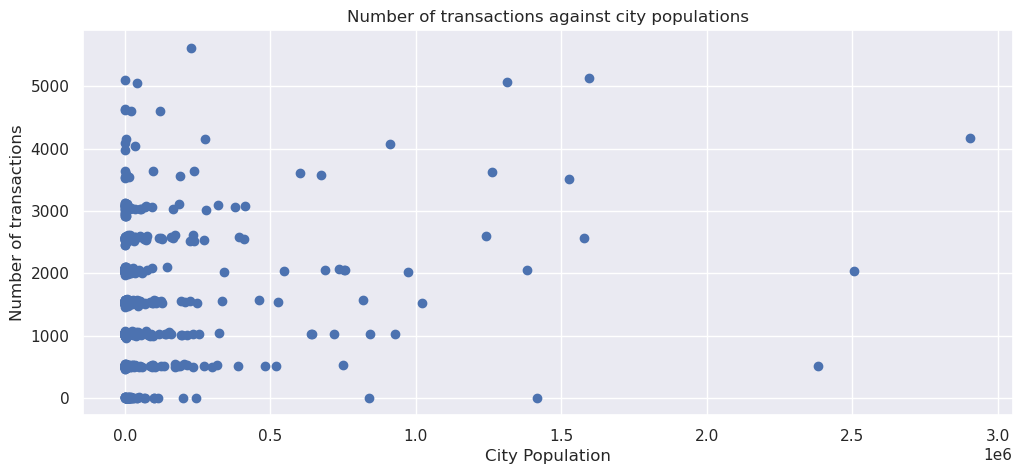

In [27]:
plt.figure(figsize=(12, 5))
plt.title("Number of transactions against city populations")
plt.scatter(city_transactions_and_pop["city_pop"], city_transactions_and_pop["count"])
plt.xlabel("City Population")
plt.ylabel("Number of transactions")
plt.show()

**Focus on legit transactions** 

In [28]:
# LEGIT 
# Number of transactions vs city population 
legit_average_pop_by_city = legit_df[["city", "city_pop"]].groupby("city").mean() 

legit_no_of_transactions_per_city = pd.DataFrame(legit_df["city"].value_counts())

# merge the dataframes 
legit_city_transactions_and_pop = pd.merge(
    left=legit_no_of_transactions_per_city,
    right=legit_average_pop_by_city,
    on="city"
)

# Check the merged dataframe 
legit_city_transactions_and_pop

,count,city_pop
city,,
Birmingham,5606,2.255411e+05
San Antonio,5105,1.595797e+06
Utica,5080,5.199915e+02
Phoenix,5073,1.312922e+06
Meridian,5047,4.290382e+04
...,...,...
De Lancey,472,7.820000e+02
Lithopolis,472,4.600000e+02
West Finley,471,7.240000e+02


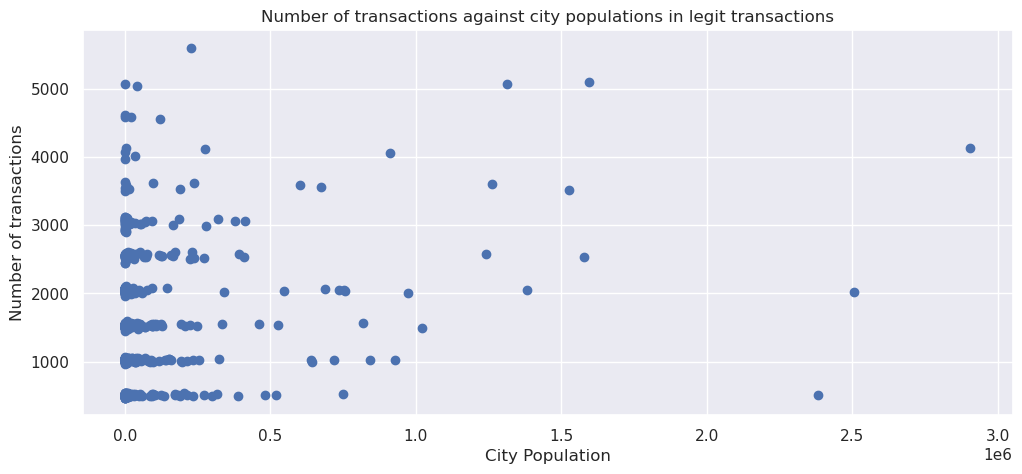

In [29]:
plt.figure(figsize=(12, 5))
plt.title("Number of transactions against city populations in legit transactions")
plt.scatter(legit_city_transactions_and_pop["city_pop"], legit_city_transactions_and_pop["count"])
plt.xlabel("City Population")
plt.ylabel("Number of transactions")
plt.show()

In [30]:
# FRAUD 
# Number of transactions vs city population 
fraud_average_pop_by_city = fraud_df[["city", "city_pop"]].groupby("city").mean() 

fraud_no_of_transactions_per_city = pd.DataFrame(fraud_df["city"].value_counts())

# merge the dataframes 
fraud_city_transactions_and_pop = pd.merge(
    left=fraud_no_of_transactions_per_city,
    right=fraud_average_pop_by_city,
    on="city"
)

# Check the merged dataframe 
fraud_city_transactions_and_pop

,count,city_pop
city,,
Houston,39,2.906700e+06
Warren,33,1.164339e+05
Huntsville,29,1.901780e+05
Naples,29,2.760020e+05
Tulsa,27,4.135740e+05
...,...,...
Bethel,3,1.234900e+04
Phenix City,2,5.974400e+04
Phoenix,2,1.312922e+06


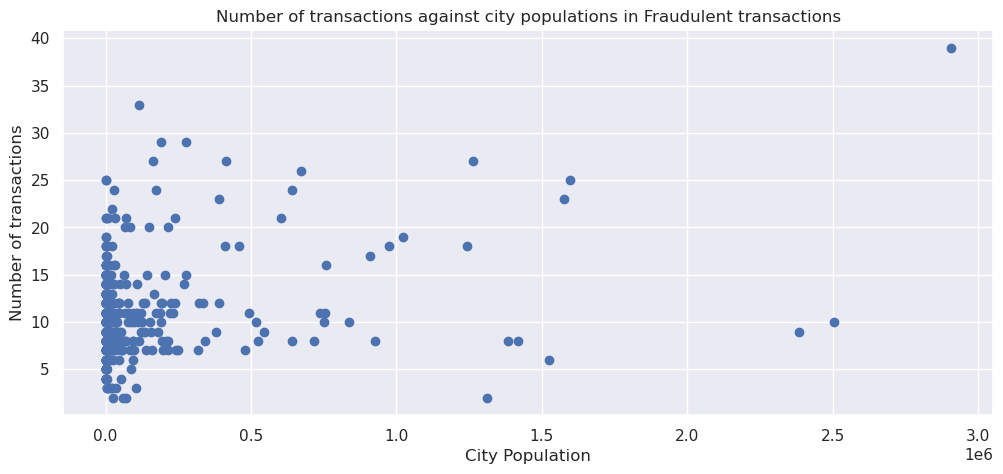

In [31]:
plt.figure(figsize=(12, 5))
plt.title("Number of transactions against city populations in Fraudulent transactions")
plt.scatter(fraud_city_transactions_and_pop["city_pop"], fraud_city_transactions_and_pop["count"])
plt.xlabel("City Population")
plt.ylabel("Number of transactions")
plt.show()